In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
rw = pd.read_csv("datasets_4458_8204_winequality-red.csv")

In [5]:
rw.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
rw.columns = rw.columns.str.replace('.','_')

In [7]:
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
rw.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

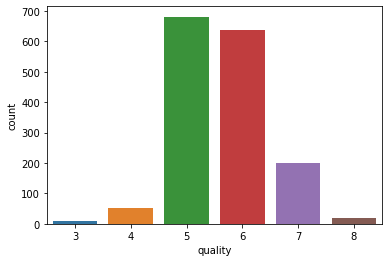

In [9]:
sb.countplot(rw['quality'])
rw['quality'].value_counts()

In [10]:
corr = rw.corr()['quality'].sort_values(ascending = True)
corr

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

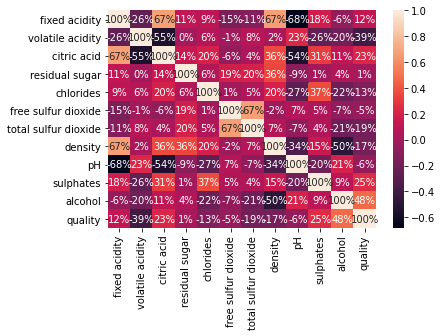

In [11]:
sb.heatmap(rw.corr(),annot=True, fmt='.0%')

In [12]:
print(abs(corr)>0.25)

volatile acidity         True
total sulfur dioxide    False
density                 False
chlorides               False
pH                      False
free sulfur dioxide     False
residual sugar          False
fixed acidity           False
citric acid             False
sulphates                True
alcohol                  True
quality                  True
Name: quality, dtype: bool


In [13]:
corr[abs(corr)>0.25]

volatile acidity   -0.390558
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

In [16]:
X = rw.iloc[:,0:11]
Y = rw.iloc[:,11]
X_train , X_test , y_train ,y_test = train_test_split(X , Y , test_size = 0.30 ,random_state = 35)

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
prediction = np.round(prediction)

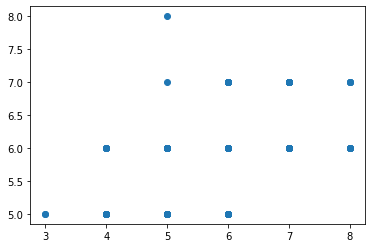

In [18]:
plt.scatter(y_test,prediction)

In [19]:
cm_lr = confusion_matrix(y_test,prediction)
cm_lr

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  11,   6,   0,   0],
       [  0,   0, 127,  73,   1,   1],
       [  0,   0,  45, 136,   8,   0],
       [  0,   0,   0,  49,  11,   0],
       [  0,   0,   0,   6,   4,   0]])

In [20]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)
prediction_dt = regressor.predict(X_test)
prediction_dt = np.round(prediction_dt)

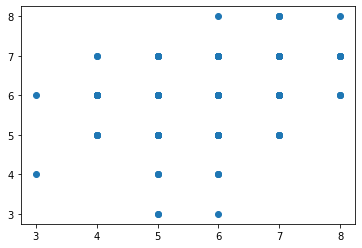

In [21]:
plt.scatter(y_test,prediction_dt)


In [22]:
cm_dtr = confusion_matrix(y_test,prediction_dt)
cm_dtr

array([[  0,   1,   0,   1,   0,   0],
       [  0,   0,   5,  10,   2,   0],
       [  2,   3, 127,  63,   7,   0],
       [  1,   3,  49, 110,  25,   1],
       [  0,   0,   5,  14,  37,   4],
       [  0,   0,   0,   3,   6,   1]])

In [ ]:
RSME = sqrt(mean_squared_error(y_test,prediction))
print(RSME)

In [ ]:
RSME = sqrt(mean_squared_error(y_test,prediction_dt))
print(RSME)